### Python capstone project - Employee attrition prediction

Employee Attrition is the gradual reduction in staff numbers that occurs as employees retire or resign and are not
replaced. Employee attrition can be costly for the businesses and the company employing the staffs. The company 
loses both the employee productivity and employee knowledge while losing the client confidence and the income in the process.

The below attributes was provided by company X to analyse the data for the existing employees and the employees 
who have left to generate insight on them and predict the number of employees who will leave the company next.

1. Satisfaction Level
2. Last evaluation
3. Number of projects
4. Average monthly hours
5. Time spent at the company
6. Whether they have had a work accident
7. Whether they have had a promotion in the last 5 years
8. Departments (column sales)
10. Salary
11. Whether the employee has left

Questions:
What type of employees are leaving? Determine which employees are prone to leave next. Present your results in the presentation sheet's presentation area.

In [110]:
#Importing python libraries for data analysis
#!pip install nbconvert
#!pip install pyppeteer
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
#Load employees attrition data for company X with both existing employees and employees who have left.
current_employees = pd.read_excel("EmployeeAttrition.xlsx","Existing employees")
left_employees = pd.read_excel("EmployeeAttrition.xlsx","Employees who have left")

Data Preprocessing for employees attrition for left employees and print the first 5 row of the data

In [5]:
left_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [6]:
# Get the number of rows and the number of columns of the employees who left
left_employees.shape

(3571, 10)

Data Preprocessing for employees attrition for existing employees and print the first 5 row of the data

In [4]:
current_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [7]:
# Get the number of rows and the number of columns of the existing employees 
current_employees.shape

(11428, 10)

In [8]:
# Creating status column for employees who are still working with the company X and give them a 0 
#as an attrition status
current_employees['Attrition'] = 0

In [13]:
# print the first 5 row of the data
current_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [14]:
# Creating status column for employees who have left the company X and give them a 1
#as an attrition status
left_employees['Attrition'] = 1

In [15]:
# print the first 5 row of the data
left_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


Merging both existing employees and employees who have left and create a single dataframe with attrition column

In [18]:
#Creating a single dataframe for combining the employees who have left and the existing employees 
# and print the first 5 rows
df = current_employees.merge(left_employees,how='outer')

In [19]:
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [20]:
#print the last 5 rows for data verification and authentication

In [24]:
df.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
14994,14995,0.40,0.57,2,151,3,0,0,support,low,1
14995,14996,0.37,0.48,2,160,3,0,0,support,low,1
14996,14997,0.37,0.53,2,143,3,0,0,support,low,1
14997,14998,0.11,0.96,6,280,4,0,0,support,low,1
14998,14999,0.37,0.52,2,158,3,0,0,support,low,1


In [25]:
#Verifying if the merged data are available in a combined dataset
print('Total number of current employees: ', current_employees.shape[0])
print('Total number of left employees: ', left_employees.shape[0])
print('Total number of employees: ', df.shape[0])

Total number of current employees:  11428
Total number of left employees:  3571
Total number of employees:  14999


Exploring the merged data and the respective data type for employees attrition in the company X

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  Attrition              14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


The merged data from the current employees and the left employees produce a combined dataset of both the current and the employees who have left. The total is equal to 14999 from 11428 for current employees and 3571 for left employees.
1. There is no missing value in the new dataset.
2. There are 11 column in the dataset, 10 existing and the added column of employee attrition.
3. The dataset have different data type such as int64,float64 and object(for categorical data).
4. Thers are 14999 rows and 11 column for the new generated data.

In [27]:
df.isna().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
Attrition                0
dtype: int64

There is no missing data in the columns as the results is 0 for all the columns

Checking if there is any remianing missing value

In [28]:
df.isnull().values.any()

False

Describing the employees attrition summary

The above command retured a false which means that there is no any missing value in our dataset

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Emp ID,14999.0,7500.000000,4329.982679,1.00,3750.50,7500.00,11249.50,14999.0
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
Attrition,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0


The describe data provide a summary of all the parameters starting from the mean, standard deviation,
minimum and the parcentile.

Data Exploratory Analysis(EDA)

<AxesSubplot:xlabel='salary', ylabel='Attrition'>

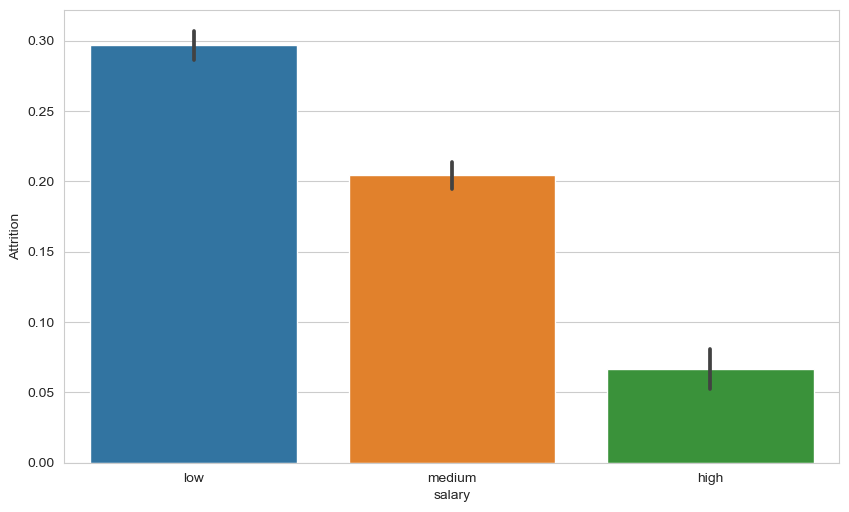

In [17]:
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(x='salary', y='Attrition',data=df)

Plotting the graph of salary and attrition, the graph shows that most of the employees who left have,they belongs to the range of low salary, following by medium salary and lastly by the high salary.

<AxesSubplot:xlabel='salary', ylabel='count'>

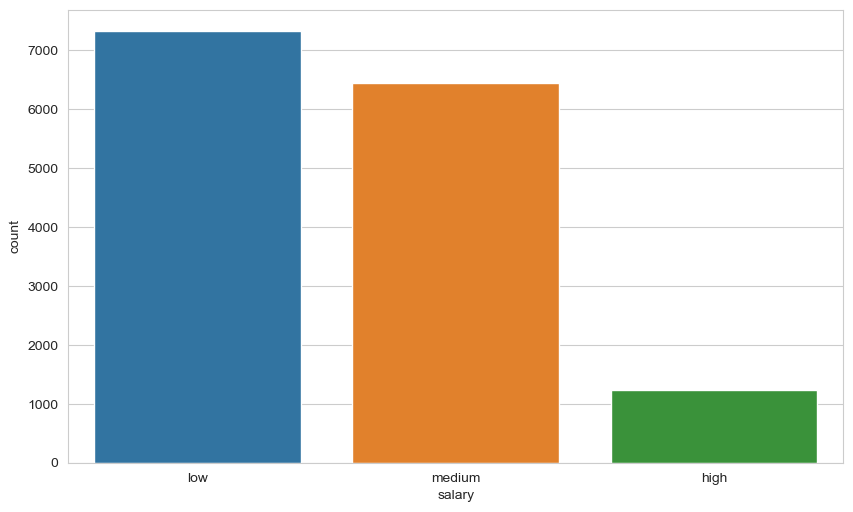

In [18]:
plt.figure(figsize=(10,6),dpi=100)
sns.countplot(x='salary',data=df)

Plotting the graph of salary, the graph shows that most of the employees who left have,they belongs 
to the range of low salary.

<AxesSubplot:xlabel='salary', ylabel='count'>

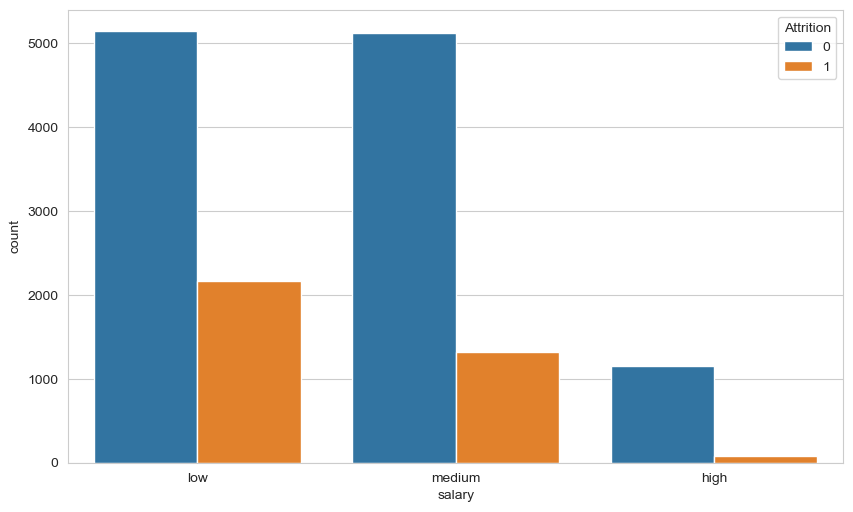

In [19]:
 plt.figure(figsize=(10,6),dpi=100)
sns.countplot(x='salary',data=df, hue='Attrition')

The above graph shows the parcentages of employees who will left the company X,the employees who have low and medium salary are highly to leave the company as shown on the above graph

<AxesSubplot:xlabel='dept', ylabel='count'>

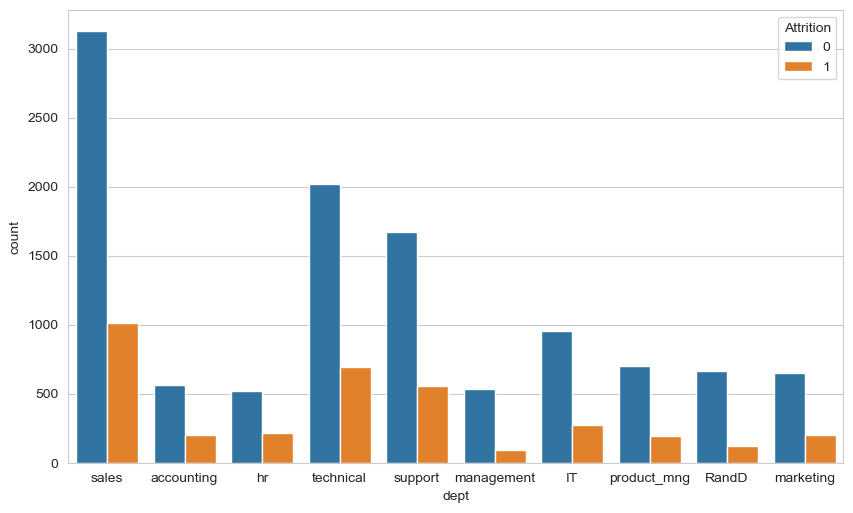

In [20]:
plt.figure(figsize=(10,6),dpi=100)
sns.countplot(x='dept',data=df, hue='Attrition')

The employee in the department of sales are likely to leave followed by the employees in the department of 
technical and lastly the employees in the department of support. Accounting and HR are at high risk for employees to leave as it shows on graph that almost 50% of employees left the comapny X.

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

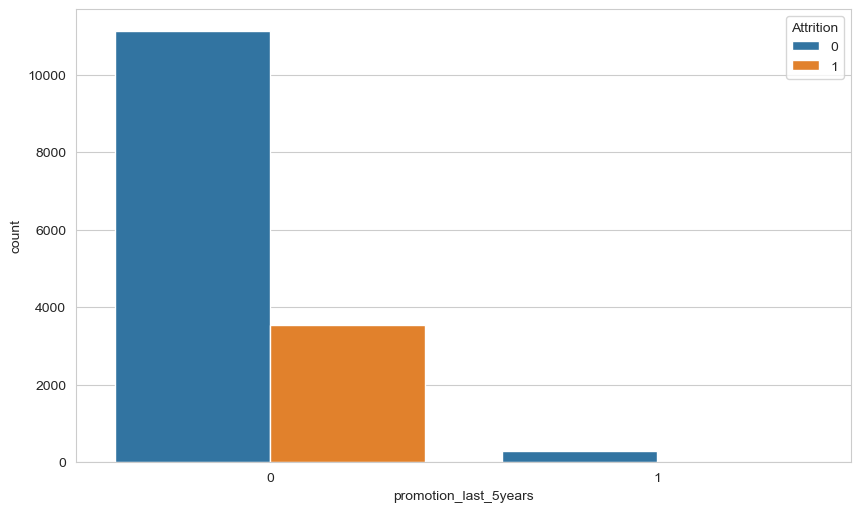

In [21]:
plt.figure(figsize=(10,6),dpi=100)
sns.countplot(x='promotion_last_5years',data=df, hue='Attrition')

In the last 5 years, the employees who left the company were not promoted in the last 5 years

<AxesSubplot:xlabel='number_project', ylabel='count'>

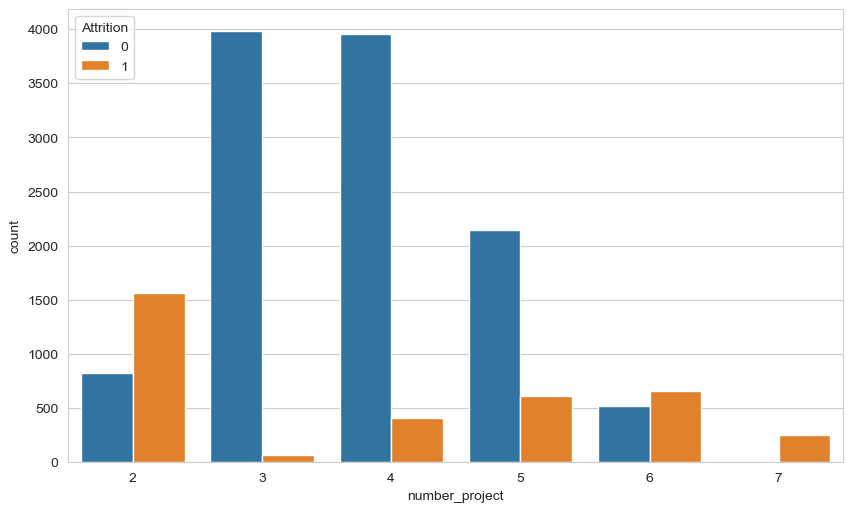

In [22]:
plt.figure(figsize=(10,6),dpi=100)
sns.countplot(x='number_project',data=df, hue='Attrition')

As the above graph shows, as the employee has more project, the greater the probalility of leaving the company

<AxesSubplot:xlabel='Attrition', ylabel='satisfaction_level'>

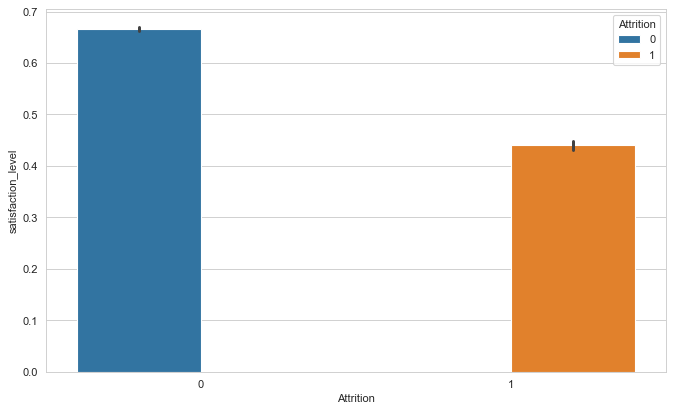

In [23]:
plt.figure(figsize=(10,6),dpi=80)
sns.barplot(y='satisfaction_level',x='Attrition', data=df, hue='Attrition')

From the satisfaction level, employees with low satisfaction level will leave the comapany X,

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

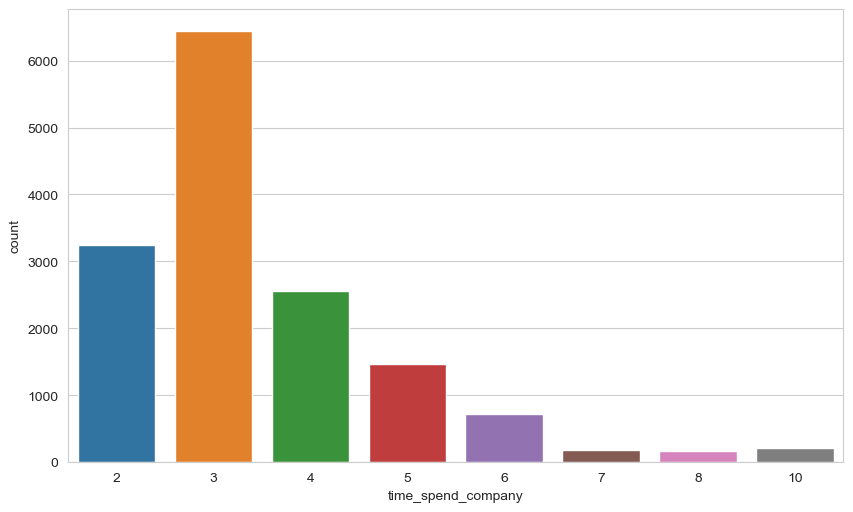

In [24]:
plt.figure(figsize=(10,6),dpi=100)
sns.countplot(x='time_spend_company',data=df)

The number of employees which spend more than 5 years in the company are low hence employees leave before reaching 
5 years in the company.

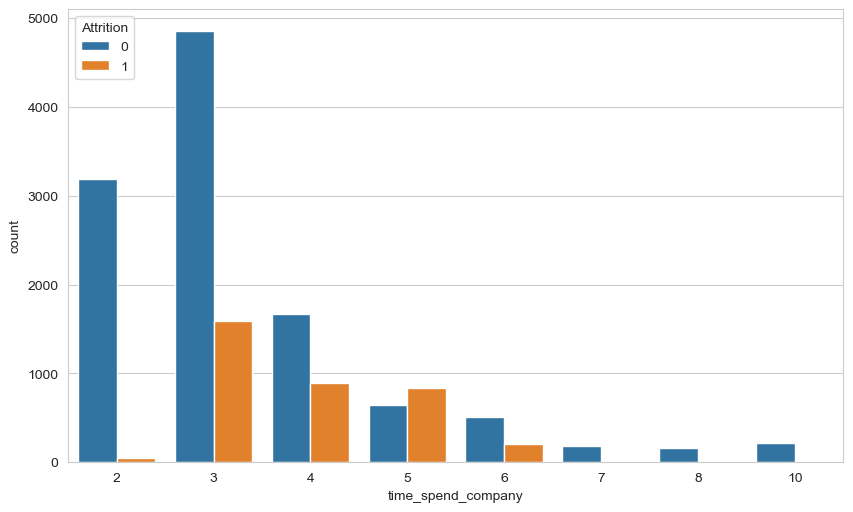

In [30]:
plt.figure(figsize=(10,6),dpi=100)
ax = sns.countplot(x='time_spend_company',data=df, hue='Attrition')

Calculate the correlation of of the all the data in company X

In [31]:
df.corr()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
Emp ID,1.000000,0.045841,-0.018168,-0.012124,-0.009850,0.144159,0.015931,0.088994,-0.129047
satisfaction_level,0.045841,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375
last_evaluation,-0.018168,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.012124,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_montly_hours,-0.009850,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,0.144159,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
Work_accident,0.015931,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,0.088994,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
Attrition,-0.129047,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


<AxesSubplot:>

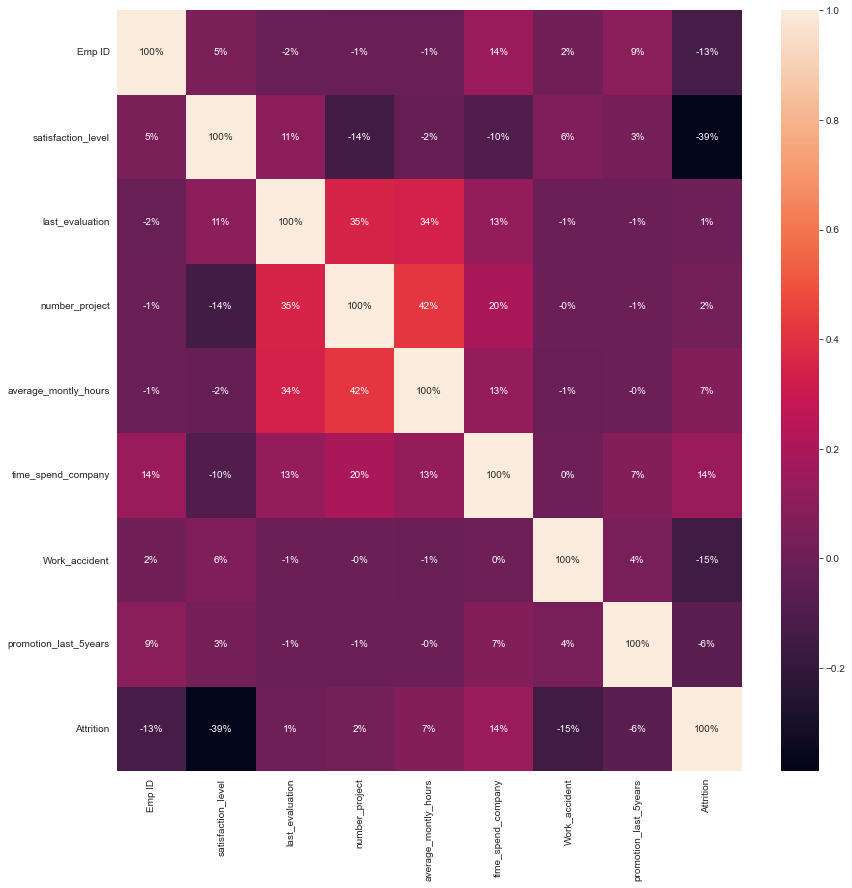

In [32]:
#Visualize the correlation in company X data
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

Looking at the heatmap graph, some columns are correlated such as number of project and average monthly hours

### Model Building and prediction

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [36]:
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [37]:
# Performing hot encoding and label encoding to transform department and the salary in number for model building

In [38]:
df['dept'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [39]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [40]:
employees_data = pd.get_dummies(data=df, columns=['dept'],drop_first=True)

In [41]:
employees_data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Attrition,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,2001,0.58,0.74,4,215,3,0,0,low,0,0,0,0,0,0,0,1,0,0
1,2002,0.82,0.67,2,202,3,0,0,low,0,0,0,0,0,0,0,1,0,0
2,2003,0.45,0.69,5,193,3,0,0,low,0,0,0,0,0,0,0,1,0,0
3,2004,0.78,0.82,5,247,3,0,0,low,0,0,0,0,0,0,0,1,0,0
4,2005,0.49,0.60,3,214,2,0,0,low,0,0,0,0,0,0,0,1,0,0


In [42]:
le = LabelEncoder()

The data in salary column are in category from low, medium and high hence we will transform it using label encoding

In [44]:
employees_data['salary'] = le.fit_transform(employees_data['salary'])

In [45]:
employees_data['salary'].value_counts()

1    7316
2    6446
0    1237
Name: salary, dtype: int64

The label encoding on salary column generate an encoding in a reverse mode for low with 1, medium with 2 
and high with 0, we want to generated an encoded data for low with 0, medium with 1 and high with 2, hence we 
apply lambda to provide that.

In [46]:
employees_dept = pd.get_dummies(data=df,columns=['dept'],drop_first=True)

In [47]:
employees_dept['salary'] = employees_dept['salary'].apply(lambda x: ['low','medium','high'].index(x))

In [48]:
employees_dept.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Attrition,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,2001,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2002,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2003,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2004,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2005,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,0,0,1,0,0


In [49]:
employees_dept['salary'].value_counts()

0    7316
1    6446
2    1237
Name: salary, dtype: int64

Let's calculate the normalization to check if our data are balance or imbalanced

In [51]:
employees_dept['Attrition'].value_counts(normalize=True) * 100

0    76.191746
1    23.808254
Name: Attrition, dtype: float64

The available data is imbalanced hence the model will produce an overfitting, we need to balance the dataset for our model to run efficiently using smote.

In [56]:
#!pip3 install imblearn
#!pip3 install -U imbalanced-learn
#!pip3 install scipy
from imblearn import under_sampling, over_sampling
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [57]:
sm = SMOTE()

In [58]:
employees_dept.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Attrition,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,2001,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2002,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2003,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2004,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2005,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,0,0,1,0,0


In [59]:
X = employees_dept.drop(['Attrition', 'Emp ID'], axis=1)
y = employees_dept['Attrition']

In [60]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,0,1,0,0
1,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,0,1,0,0
2,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,0,1,0,0
3,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,0,1,0,0
4,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,0,1,0,0


In [61]:
y

0        0
1        0
2        0
3        0
4        0
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: Attrition, Length: 14999, dtype: int64

In [62]:
X_resampled, y_resampled = sm.fit_resample(X,y)

In [63]:
X_resampled

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.580000,0.740000,4,215,3,0,0,0,0,0,0,0,0,0,1,0,0
1,0.820000,0.670000,2,202,3,0,0,0,0,0,0,0,0,0,1,0,0
2,0.450000,0.690000,5,193,3,0,0,0,0,0,0,0,0,0,1,0,0
3,0.780000,0.820000,5,247,3,0,0,0,0,0,0,0,0,0,1,0,0
4,0.490000,0.600000,3,214,2,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22851,0.438234,0.467649,2,132,3,0,0,0,0,0,0,0,1,0,0,0,0
22852,0.744163,0.922562,4,261,5,0,0,1,0,0,0,0,0,0,0,0,1
22853,0.450000,0.556812,2,154,3,0,0,0,0,0,0,0,1,0,0,0,0
22854,0.382378,0.507146,2,146,3,0,0,1,0,0,0,0,0,0,0,0,0


After resampling the new data produce a 22856 rows and 17 columns

In [64]:
y_resampled.value_counts()

0    11428
1    11428
Name: Attrition, dtype: int64

The dataset is now balanced after applying smote

Split the data into the test and training dataset for our model

In [67]:
X_train, X_test, y_train,y_test = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=1, shuffle=True)

In [68]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
2130,0.8100,0.5800,3,243,4,0,0,2,0,0,0,0,1,0,0,0,0
11614,0.0900,0.8500,6,297,4,0,0,1,0,0,1,0,0,0,0,0,0
17323,0.1000,0.9300,7,305,4,0,0,1,0,0,0,0,0,0,0,0,1
13521,0.4600,0.5500,2,129,3,0,0,0,0,0,0,0,0,0,1,0,0
1730,0.7900,0.7800,3,101,2,1,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.2500,0.8900,4,154,10,0,0,2,0,0,0,1,0,0,0,0,0
17289,0.4349,0.5549,2,136,3,0,0,0,0,0,0,0,0,0,1,0,0
5192,0.6600,0.7200,5,152,3,1,0,0,0,0,0,0,0,0,1,0,0
12172,0.3900,0.5200,2,134,3,0,0,0,0,0,0,0,0,0,0,0,1


We will apply different machine learning models

In [70]:
lr = LogisticRegression()

In [71]:
lr.fit(X_train,y_train)

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
lr.score(X_test,y_test)

0.7965582616304506

In [73]:
lr.score(X_train,y_train)

0.7912369523095193

There is not overfitting in our dataset, hence the training and the test produce the almost the same score

In [74]:
y_pred = lr.predict(X_test)

In [75]:
print(classification_report(y_test,y_pred))
print('\n')
print(accuracy_score(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))
print('This is for Logistic Regression')

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      3424
           1       0.78      0.83      0.80      3433

    accuracy                           0.80      6857
   macro avg       0.80      0.80      0.80      6857
weighted avg       0.80      0.80      0.80      6857



0.7965582616304506


[[2615  809]
 [ 586 2847]]
This is for Logistic Regression


In [76]:
dt = DecisionTreeClassifier()

In [77]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
dt.score(X_test,y_test)

0.9736036167420155

In [79]:
dt.score(X_train,y_train)

1.0

In [80]:
y_pred1 = dt.predict(X_test)

In [81]:
print(classification_report(y_test,y_pred1))
print('\n')
print(accuracy_score(y_test,y_pred1))
print('\n')
print(confusion_matrix(y_test,y_pred1))
print('This is for Decision Tree')

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3424
           1       0.97      0.98      0.97      3433

    accuracy                           0.97      6857
   macro avg       0.97      0.97      0.97      6857
weighted avg       0.97      0.97      0.97      6857



0.9736036167420155


[[3316  108]
 [  73 3360]]
This is for Decision Tree


In [82]:
rf = RandomForestClassifier()

In [83]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [84]:
rf.score(X_test,y_test)

0.984541344611346

In [85]:
rf.score(X_train,y_train)

1.0

In [86]:
y_pred2 = rf.predict(X_test)

In [87]:
print(classification_report(y_test,y_pred2))
print('\n')
print(accuracy_score(y_test,y_pred2))
print('\n')
print(confusion_matrix(y_test,y_pred2))
print('This is for Random Forest')

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3424
           1       0.99      0.97      0.98      3433

    accuracy                           0.98      6857
   macro avg       0.98      0.98      0.98      6857
weighted avg       0.98      0.98      0.98      6857



0.984541344611346


[[3406   18]
 [  88 3345]]
This is for Random Forest


In [88]:
#Predicting the employees who will left next, we will be using the existing employees data in the company X,
#for the prediction

In [89]:
current_employees 

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...,...
11423,14207,0.90,0.55,3,259,10,1,1,management,high,0
11424,14208,0.74,0.95,5,266,10,0,1,management,high,0
11425,14209,0.85,0.54,3,185,10,0,1,management,high,0
11426,14210,0.33,0.65,3,172,10,0,1,marketing,high,0


In [90]:
current_employees['salary'] = current_employees['salary'].apply(lambda x: ['low','medium','high'].index(x))

In [91]:
current_employees = pd.get_dummies(data=current_employees,columns=['dept'],drop_first=True)

In [92]:
current_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Attrition,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,2001,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2002,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2003,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2004,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2005,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,0,0,1,0,0


In [93]:
x1 = current_employees.drop(['Emp ID','Attrition'], axis=1)

In [94]:
x1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.58,0.74,4,215,3,0,0,0,0,0,0,0,0,0,1,0,0
1,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,0,1,0,0
2,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,0,1,0,0
3,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,0,1,0,0
4,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11423,0.90,0.55,3,259,10,1,1,2,0,0,0,1,0,0,0,0,0
11424,0.74,0.95,5,266,10,0,1,2,0,0,0,1,0,0,0,0,0
11425,0.85,0.54,3,185,10,0,1,2,0,0,0,1,0,0,0,0,0
11426,0.33,0.65,3,172,10,0,1,2,0,0,0,0,1,0,0,0,0


In [95]:
# Using the existing employees data to predict the employees who will leave the next in the company X
#1. Logistic Regression

In [96]:
d = lr.predict(x1)
d

array([1, 1, 1, ..., 0, 1, 1])

In [97]:
current_employees['Emp ID']

0         2001
1         2002
2         2003
3         2004
4         2005
         ...  
11423    14207
11424    14208
11425    14209
11426    14210
11427    14211
Name: Emp ID, Length: 11428, dtype: int64

In [98]:
employees = pd.DataFrame({'Emp ID':current_employees['Emp ID'],'status':d})

In [99]:
employees['status'].value_counts()

0    8658
1    2770
Name: status, dtype: int64

In [100]:
# Using the existing employees data to predict the employees who will leave the next in the company X
#2.Random forest

In [101]:
e = rf.predict(x1)
e

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
employees1 = pd.DataFrame({'Emp ID':current_employees['Emp ID'],'status':e})

In [103]:
employees1['status'].value_counts()

0    11410
1       18
Name: status, dtype: int64

In [104]:
# Using the existing employees data to predict the employees who will leave the next in the company X
#3.Decision Tree

In [105]:
f = dt.predict(x1)
f

array([0, 0, 0, ..., 0, 0, 0])

In [106]:
employees2 = pd.DataFrame({'Emp ID':current_employees['Emp ID'],'status':f})

In [107]:
employees2['status'].value_counts()

0    11320
1      108
Name: status, dtype: int64

After apply logistic regression, decision tree and random, we have seen that the random model is more efficient 
as it produce 18 people which will leave the company next